In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [ ]:
#Loading Data
from tensorflow.keras.datasets import fashion_mnist

(train_images,  train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#reshaping data
train_images = train_images.reshape((train_images.shape[0], train_images.shape[1], train_images.shape[2], 1))

test_images = test_images.reshape((test_images.shape[0], test_images.shape[1], test_images.shape[2], 1))

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**SPLIT THE DATA TO 80/20**

In [ ]:
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
#Set the batch size

batch_size = 32

<function matplotlib.pyplot.show(close=None, block=None)>

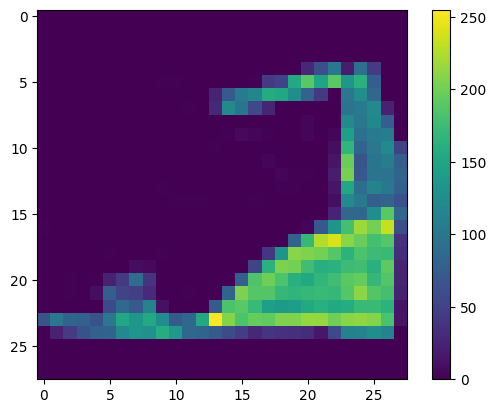

In [ ]:
plt.figure()
plt.imshow(train_images[5000])
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
#normalizing the pixel values

train_images = train_images/255
test_images = test_images/255

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[1]])
plt.show()

In [ ]:
first_model = Sequential()

#adding convolutional layer
first_model.add(Conv2D(64,(3,3), activation='relu', input_shape=(28, 28, 1)))

#adding pooling layer
first_model.add(MaxPool2D (2,2))

#adding fully connected layer
first_model.add(Flatten())
first_model.add(Dense(256, activation='relu'))

#adding output layer
first_model.add(Dense(10, activation='softmax'))

In [ ]:
first_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               2769152   
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2772362 (10.58 MB)
Trainable params: 2772362 (10.58 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
first_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
first_model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 117s 77ms/step - loss: 0.3913 - accuracy: 0.8603
Epoch 2/10
1500/1500 [==============================] - 105s 70ms/step - loss: 0.2551 - accuracy: 0.9055
Epoch 3/10
1500/1500 [==============================] - 114s 76ms/step - loss: 0.2048 - accuracy: 0.9233
Epoch 4/10
1500/1500 [==============================] - 104s 70ms/step - loss: 0.1678 - accuracy: 0.9379
Epoch 5/10
1500/1500 [==============================] - 98s 65ms/step - loss: 0.1386 - accuracy: 0.9486
Epoch 6/10
1500/1500 [==============================] - 120s 80ms/step - loss: 0.1111 - accuracy: 0.9589
Epoch 7/10
1500/1500 [==============================] - 111s 74ms/step - loss: 0.0899 - accuracy: 0.9672
Epoch 8/10
1500/1500 [==============================] - 108s 72ms/step - loss: 0.0717 - accuracy: 0.9736
Epoch 9/10
1500/1500 [==============================] - 107s 72ms/step - loss: 0.0587 - accuracy: 0.9794
Epoch 10/10
1500/1500 [==============================] -

In [ ]:
test_loss, test_acc = first_model.evaluate(test_images, test_labels, verbose=2)

print('\nTest Accuracy:', test_acc)

375/375 - 4s - loss: 0.3310 - accuracy: 0.9147 - 4s/epoch - 11ms/step

Test Accuracy: 0.9146666526794434


**Split the Data to 70/30**

In [ ]:
train_images_7030, test_images_7030, train_labels_7030, test_labels_7030 = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

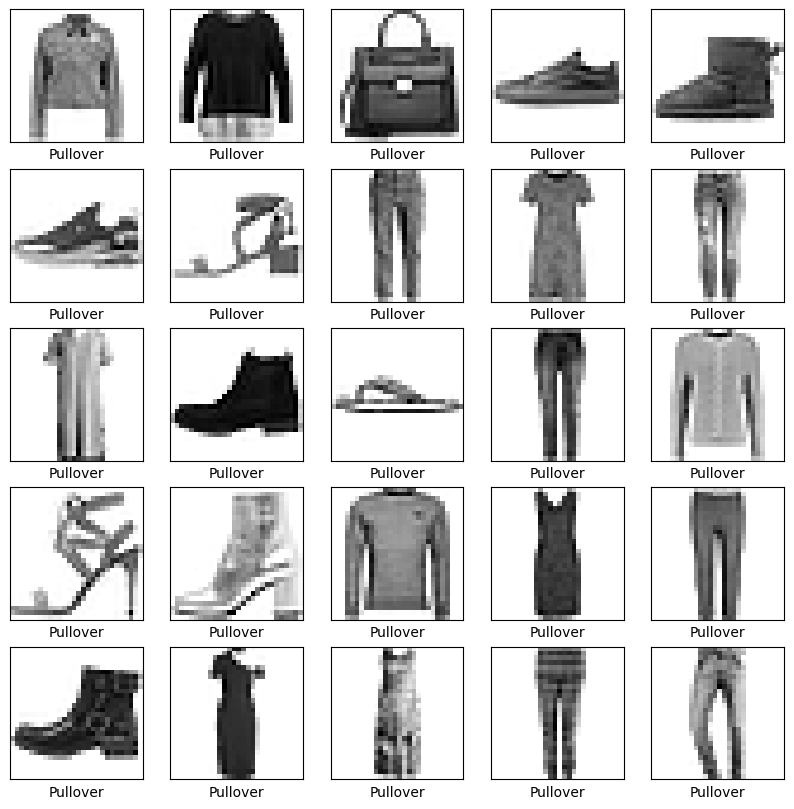

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images_7030[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels_7030[1]])
plt.show()

In [ ]:
second_model = Sequential()

#adding convolutional layer
second_model.add(Conv2D(64,(3,3), activation='relu', input_shape=(28, 28, 1)))

#adding pooling layer
second_model.add(MaxPool2D (2,2))

#adding fully connected layer
second_model.add(Flatten())
second_model.add(Dense(256, activation='relu'))

#adding output layer
second_model.add(Dense(10, activation='softmax'))

In [ ]:
second_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_8 (Dense)             (None, 256)               2769152   
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2772362 (10.58 MB)
Trainable params: 2772362 (10.58 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
second_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
second_model.fit(train_images_7030, train_labels_7030, epochs=10)

Epoch 1/10
1050/1050 [==============================] - 69s 64ms/step - loss: 0.4257 - accuracy: 0.8494
Epoch 2/10
1050/1050 [==============================] - 68s 65ms/step - loss: 0.2743 - accuracy: 0.9016
Epoch 3/10
1050/1050 [==============================] - 70s 67ms/step - loss: 0.2240 - accuracy: 0.9187
Epoch 4/10
1050/1050 [==============================] - 75s 72ms/step - loss: 0.1807 - accuracy: 0.9337
Epoch 5/10
1050/1050 [==============================] - 70s 67ms/step - loss: 0.1522 - accuracy: 0.9443
Epoch 6/10
1050/1050 [==============================] - 79s 75ms/step - loss: 0.1228 - accuracy: 0.9546
Epoch 7/10
1050/1050 [==============================] - 70s 67ms/step - loss: 0.0969 - accuracy: 0.9650
Epoch 8/10
1050/1050 [==============================] - 75s 72ms/step - loss: 0.0816 - accuracy: 0.9710
Epoch 9/10
1050/1050 [==============================] - 75s 71ms/step - loss: 0.0641 - accuracy: 0.9767
Epoch 10/10
1050/1050 [==============================] - 73s 69m

In [ ]:
test_loss, test_acc = second_model.evaluate(test_images_7030, test_labels_7030, verbose=2)

print('\nTest Accuracy:', test_acc)

450/450 - 6s - loss: 0.4115 - accuracy: 0.9012 - 6s/epoch - 12ms/step

Test Accuracy: 0.9011805653572083


**Evaluation**

I have split the data types into 80/20 and 70/30/. I also used same values and model which is sequential in these two datasets. I noticed that the first dataset compiled after 20 minutes which is longer than I expected. But it resulted in a 0.98 accuracy in training and 0.91 accuracy in testing. In the 70/30 it only took 12 minutes to compile but their accuracy is close. In the 70/30 dataset it's training accuracy is 0.98 and its testing accuracy is 0.90 and its lower than the 80/20 dataset.